In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import string


In [8]:
bs=BeautifulSoup(open("data.html"))

In [22]:
t=bs.div.find_all("div")

In [38]:
for d in t:
    try:
        print d["class"]
    except KeyError:
        print

['gridStyle', 'ng-scope', 'ngGrid', 'ng1488593293588']
['ngTopPanel', 'ng-scope']
['ngGroupPanel', 'ng-hide']
['ngGroupPanelDescription', 'ng-binding']
['ngHeaderContainer']
['ngHeaderScroller']
['ngHeaderCell', 'ng-scope', 'col0', 'colt0']
['ngVerticalBar', 'ngVerticalBarVisible']

['ngHeaderSortColumn', 'ngSorted']
['ngHeaderText', 'ng-binding', 'colt0']
['ngSortButtonDown', 'ng-hide']
['ngSortButtonUp', 'ng-hide']
['ngSortPriority', 'ng-binding']
['ng-hide', 'ngUnPinnedIcon']
['ngHeaderGrip', 'ng-scope']
['ngHeaderCell', 'ng-scope', 'col1', 'colt1']
['ngVerticalBar', 'ngVerticalBarVisible']

['ngHeaderSortColumn', 'ngSorted']
['ngHeaderText', 'ng-binding', 'colt1']
['ngSortButtonDown', 'ng-hide']
['ngSortButtonUp', 'ng-hide']
['ngSortPriority', 'ng-binding']
['ng-hide', 'ngUnPinnedIcon']
['ngHeaderGrip', 'ng-scope']
['ngHeaderCell', 'ng-scope', 'col2', 'colt2']
['ngVerticalBar', 'ngVerticalBarVisible']

['ngHeaderSortColumn', 'ngSorted']
['ngHeaderText', 'ng-binding', 'colt2']
['ngS

In [72]:
colnamemap={header["class"][-1]:string.strip(header.getText()) for header in bs.find_all("div",class_="ngHeaderText")}
colnamemap

{'colt0': u'Year',
 'colt1': u'Country / territory of asylum/residence',
 'colt10': u'Otherwise closed',
 'colt11': u'Total decisions',
 'colt12': u'Total persons pending end-year',
 'colt13': u'of which UNHCR-assisted',
 'colt2': u'Origin',
 'colt3': u'RSD procedure type / level',
 'colt4': u'Total persons pending start-year',
 'colt5': u'of which UNHCR-assisted',
 'colt6': u'Applied during year',
 'colt7': u'Recognized',
 'colt8': u'Other',
 'colt9': u'Rejected'}

In [158]:
rowcontents=[{cell["class"][3]:string.strip(cell.getText()) 
              for cell in row.find_all("div", class_="ngCellText")} 
              for row in bs.find_all("div",class_="ngRow")]

t=DataFrame(rowcontents)[['colt'+str(i) for i in range(14)]].rename(columns=colnamemap)
t.columns=['year','destination','origin','typeLevel','totalYearStart','totalYearStartUnhcr',
          'appliedDuringYear','recognized','other','rejected','otherClosed','totalDecisions','totalYearEnd','totalYearEndUnhcr']
for column in t.columns[4:]:
    t[column]=t[column].apply(lambda x:  0 if x=='' else int(''.join([c for c in x if c != ','])))
t.year=t.year.apply(str)
    
t[t.typeLevel.str.startswith('U / F')]
t

,year,destination,origin,typeLevel,totalYearStart,totalYearStartUnhcr,appliedDuringYear,recognized,other,rejected,otherClosed,totalDecisions,totalYearEnd,totalYearEndUnhcr
0,2015,Indonesia,Afghanistan,U / AR,122,122,89,50,0,54,0,104,107,107
1,2015,Indonesia,Afghanistan,U / FI,4052,4052,1315,1462,0,59,171,1692,3675,3675
2,2014,Indonesia,Afghanistan,U / FI,2760,2760,3627,1023,0,174,1138,2335,4052,4052
3,2014,Indonesia,Afghanistan,U / AR,46,46,166,24,0,66,0,90,122,122
4,2013,Indonesia,Afghanistan,U / AR,44,44,92,14,0,35,41,90,46,46
5,2013,Indonesia,Afghanistan,U / FI,2951,2951,3392,960,0,81,2542,3583,2760,2760
6,2012,Indonesia,Afghanistan,U / FA,1649,1649,4056,654,0,33,2023,2710,2995,2995
7,2011,Indonesia,Afghanistan,U / FA,1207,1207,2118,388,0,11,1277,1676,1649,1649
8,2010,Indonesia,Afghanistan,U / FA,1411,1411,2524,329,0,1,2398,2728,1207,1207
9,2009,Indonesia,Afghanistan,U / FI,136,136,2304,256,0,34,753,1043,1397,1397


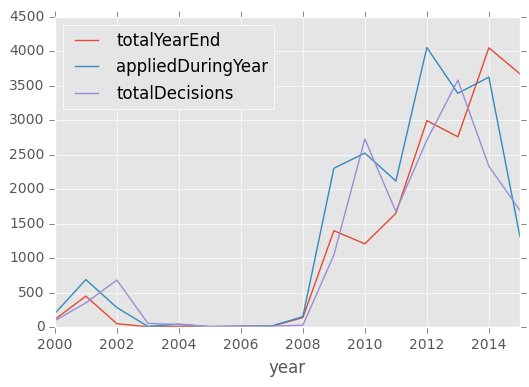

In [169]:
t[t.typeLevel.str.startswith('U / F')][['year','totalYearEnd','appliedDuringYear','totalDecisions']].set_index('year').sort_index().plot.line()

In [153]:
1 if True  else 2

1